<a href="https://colab.research.google.com/github/majorquev/DBDC_202507_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase8/1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.”

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [1]:
# pnorm()
#?pnorm

pnorm(160, mean = 171.8, sd = 5)
# Hay una prob de un 0.9% de encontara una persona adulta..... con estatura menor o igual a 160 cms.
# Es decir, se espera que de cada 100 personas adultas...., approx. 1 de ellas tenga estatura menor o igual a 160 cms.

[1] 0.009137468

In [ ]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [4]:
#P(estatura > 160) = 1- P(estatura <= 160)
1-pnorm(160, mean = 171.8, sd = 5) # 99% de prob de que un adulto Chileno mida más de 1.60.

#NOTA
# lower.tail
pnorm(160, mean = 171.8, sd = 5, lower.tail = F)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [5]:
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)
# Se espera que 5 de cada 100 personas adultas.... midan entre 180 y 190 cms.

[1] 0.05036626

In [7]:
?pbinom

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [8]:
# Cual es la estatura que acumula el 90 % de probabilidad
qnorm(0.9, mean = 171.8, sd = 5)
# El 90% de la plobación tiene una estatura menor o igual a 178.2
# Que la proba. de que una persona adulta... tenga estatura menor o igual a 178.2, es de un 90%.

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [37]:
# estaturas
set.seed(2020) #semilla

estaturas <- rnorm(n = 1000, mean = 171.8, sd = 5)

In [38]:
estaturas

[1] 173.6849 173.3077 166.3099 166.1480 157.8173 175.4029 176.4956 170.6531
   [9] 180.5957 172.3868 167.5344 176.3463 177.7819 169.9421 171.1837 180.8002
  [17] 180.3200 156.6062 160.3551 172.0915 182.6718 177.2909 173.3911 171.4343
  [25] 175.9713 172.7938 178.2892 176.4836 171.0628 172.3522 167.7375 168.0815
  [33] 177.2767 183.9769 173.7406 173.2531 170.3720 172.1801 168.9985 174.0359
  [41] 176.3425 169.2747 170.2950 168.1698 165.8996 173.0654 169.9464 171.9109
  [49] 175.1002 174.2440 170.8561 174.8068 168.4312 174.1803 172.3938 172.4061
  [57] 170.8698 165.1586 168.9654 174.6942 181.3452 173.0538 163.8084 187.8082
  [65] 176.5762 173.6432 176.4146 170.7724 172.2648 172.6413 175.7792 180.0300
  [73] 163.2154 170.2083 167.2793 168.2800 162.9095 168.1887 172.0308 173.0183
  [81] 174.9417 171.6768 183.3708 172.6861 166.6779 183.1734 162.3547 177.2698
  [89] 181.0308 174.4052 164.1352 162.1032 174.2346 178.0262 170.7136 167.9020
  [97] 173.5444 175.2086 169.1427 168.4130 163.1561 166.8437 168.8725 173.7176
 [105] 175.5333 167.1579 170.1091 179.5256 173.1325 173.2977 170.1860 178.9767
 [113] 176.8326 163.2029 173.2946 167.6764 165.8021 165.4181 171.1841 182.6297
 [121] 170.2386 173.6372 178.1472 160.4757 165.3508 172.7394 175.5582 180.7234
 [129] 179.3414 167.0342 172.3171 168.7722 171.3120 171.1828 166.5766 171.4256
 [137] 180.6007 164.6394 185.1110 165.3440 171.8755 171.6016 182.7572 161.9178
 [145] 174.1183 170.4889 166.1214 172.8565 172.2971 156.5166 170.0643 162.0669
 [153] 170.7196 164.5540 173.5272 172.7410 166.1607 172.0523 168.3865 175.0403
 [161] 174.8518 169.2367 175.5720 172.7405 162.1586 177.9791 173.4414 167.5254
 [169] 162.3216 176.0335 178.0201 172.9813 167.9965 175.6611 175.1078 163.8313
 [177] 160.8483 165.9162 177.0500 171.7715 170.4199 176.0426 166.5553 163.1321
 [185] 183.8707 170.8218 176.4339 168.2327 165.3013 176.2215 177.8032 165.9483
 [193] 175.6074 176.1505 168.1638 174.9331 166.3428 169.2195 171.8847 175.1050
 [201] 168.1523 176.0569 169.8175 173.8334 166.6072 165.5206 177.5851 176.9934
 [209] 171.3238 166.3085 174.6018 170.5349 182.8355 168.0848 174.0318 172.3285
 [217] 166.6993 176.4198 166.2708 169.0813 174.6216 164.7997 171.0987 171.0786
 [225] 167.9599 174.9912 177.3936 174.0293 162.2592 171.7301 174.3316 174.0518
 [233] 163.4874 180.1491 158.7679 175.7878 174.2335 175.1968 172.4918 180.2749
 [241] 172.0222 171.9593 184.4822 179.7799 172.4626 170.5476 161.7607 179.1356
 [249] 170.1594 167.8273 171.7902 168.7704 179.5166 166.1488 165.4551 168.2251
 [257] 178.0200 172.5631 174.1943 175.7310 166.7279 163.5027 170.8202 174.6028
 [265] 171.0011 165.0067 164.2827 171.3136 176.6363 170.2932 159.7239 165.6712
 [273] 168.6754 166.9218 159.8664 182.9679 176.2592 172.8959 167.5763 164.9933
 [281] 172.5393 157.9168 175.5890 167.7246 177.0512 169.8373 171.8528 176.7127
 [289] 176.2103 161.1475 156.2414 168.7163 178.0925 170.6633 173.4213 168.3444
 [297] 169.1924 180.9099 167.0496 168.9302 176.3834 170.6655 177.7110 179.4074
 [305] 178.9899 183.4365 182.8894 176.0410 172.3152 170.9015 172.1273 171.9573
 [313] 172.9630 173.9041 171.4796 169.5760 170.6627 165.7408 169.2794 174.3327
 [321] 172.4481 169.2563 170.3478 175.8250 175.2912 172.0193 161.7519 172.3429
 [329] 176.3108 180.4130 170.1663 175.8487 169.4202 164.4896 161.4515 181.0085
 [337] 172.0111 166.9240 169.6869 169.2737 165.1569 168.0344 166.6337 172.3297
 [345] 175.4154 166.2669 172.9305 171.0115 172.5154 168.5735 167.4327 171.0297
 [353] 174.6306 169.6473 170.2260 171.2590 168.4118 161.5737 180.0575 168.5459
 [361] 177.3310 159.0208 165.6590 171.1913 175.2006 171.4504 184.8097 171.0633
 [369] 174.3439 162.2063 176.8312 169.7579 172.7617 173.7177 171.6607 174.1439
 [377] 182.1377 168.5836 166.9506 166.3548 181.2828 171.1334 168.6127 177.5094
 [385] 166.2208 174.6612 163.8410 165.6384 177.7294 168.6923 174.9776 174.0258
 [393] 171.8910 170.5808 170.5191 176.5925 180.6947 168.1658 170.7349 166.2495
 [401] 162.0753 173.4274 177.0320 169.9410 170.5283 1

In [19]:
length(estaturas)
mean(estaturas)
sd(estaturas)

[1] 1000

[1] 171.6666

[1] 5.184827

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

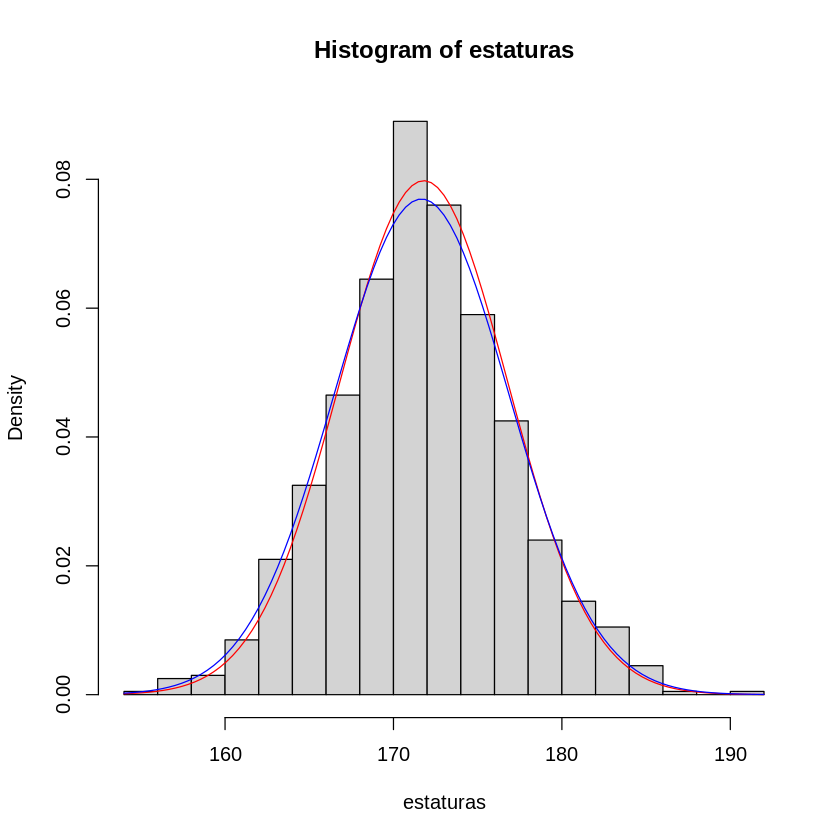

In [22]:
## NOTA
hist(estaturas, freq = F, breaks = 20)
curve(dnorm(x,mean = 171.8, sd = 5), add = T, col = "red" )
curve(dnorm(x,mean = mean(estaturas), sd = sd(estaturas)), add = T, col = "blue" )

In [24]:
library(ggplot2)
library(dplyr)
df <- data.frame(est = estaturas)
head(df)


,est
,<dbl>
1,173.6849
2,173.3077
3,166.3099
4,166.1480
5,157.8173
6,175.4029


In [29]:
(mu_est <- mean(estaturas))
(sd_est <- sd(estaturas))

[1] 171.6666

[1] 5.184827

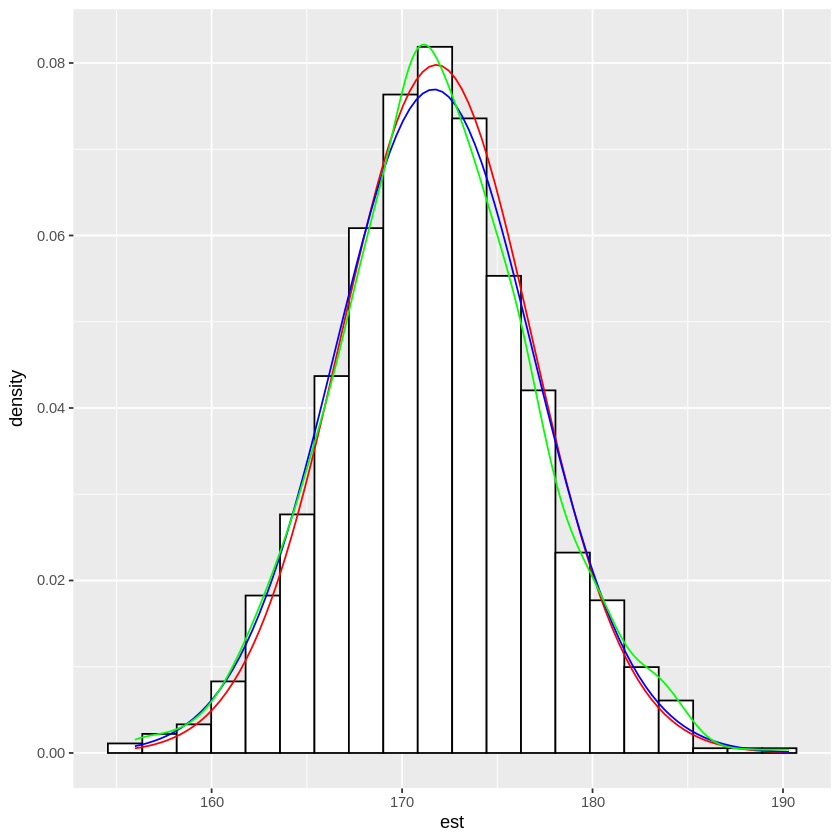

In [30]:
# Notar que en un histograma podemos visualizar los conteos o las frecuencias relativas.
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 20,
    fill = "white",
    color = "black",
    mapping = aes(y = after_stat(density))
  ) +
  stat_function(
    fun = dnorm,
    args = list(mean = 171.8, sd = 5),
    col = "red" # la densidad normal con los parametros reales
  ) +
  stat_function(
    fun = dnorm,
    args = list(mean = mu_est, sd = sd_est),
    col = "blue" # la densidad normal con los parametros reales
  ) +
  geom_density(col = "green") # Estimación "no paramétrica" de la densidad de nuestra muestra. (Ref. Estimación por Kernels)




# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que
 al menos 30  personas compren el artículo ofrecido?

In [40]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2
1-pbinom(q = 29 , size = 100, prob = 0.2)# 11%
pbinom(q = 29 , size = 100, prob = 0.2, lower.tail = F)



[1] 0.01124898

[1] 0.01124898

In [42]:

# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(30 , size = 100, prob = 0.2)
pbinom(30 , size = 100, prob = 0.2) - pbinom(29 , size = 100, prob = 0.2)


[1] 0.005189643

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [ ]:
# size = 8
# prob = 0.7


## Lanzando una moneda
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [ ]:
#size = n = 14, y prob = p = 0.5 ?



In [ ]:
# P(X >= 10)


  
**b)** Si se repite el experimento 5 veces.


*   ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?
*   ¿En qué % de casos se obtuvo exactamente 4 caras? ¿ y si se repite más veces?


 Utillice la función rbinom para simular el experimento 100 veces.

In [ ]:
# simulamos un experimento binomial





In [ ]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.


# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

** P5. ** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio.
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [ ]:
# La tasa de éxito en una dist. poisson es el parámetro lambda
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos






**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [ ]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

